In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns


import scipy.stats as stats
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re

Saving USvideos.csv to USvideos.csv


In [6]:
data = pd.read_csv('USvideos.csv')

data.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [13]:
import json
import pandas as pd

print(data.shape)

# loading category json file
category_json_path = './US_category_id.json'

# Load and parse the category JSON file
with open(category_json_path) as file:
    category_data = json.load(file)

# Extracting category names from the JSON file
category_dict = {int(category['id']): category['snippet']['title'] for category in category_data['items']}

# Merge the category names with the main dataframe
data['category_name'] = data['category_id'].map(category_dict)


data.head()

(40949, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [17]:
category_dict = {int(category['id']): category['snippet']['title'] for category in category_data['items']}

# Merge the category names with the main dataframe
data['category_name'] = data['category_id'].map(category_dict)
data.dtypes


,0
video_id,object
trending_date,object
title,object
channel_title,object
category_id,int64
publish_time,object
tags,object
views,int64
likes,int64
dislikes,int64


In [18]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables'.format(len(categorical)))

There are 9 categorical variables


In [19]:
data[categorical].head()


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,SHANtell martin,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...,Entertainment


In [20]:
for var in data.columns:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

description 0.013919753840142617


In [21]:
trending_days_count = data.groupby('video_id')['trending_date'].nunique()

trending_days_df = trending_days_count.reset_index()

trending_days_df.rename(columns={'trending_date': 'trending_days'}, inplace=True)

print(trending_days_df.head())

      video_id  trending_days
0  -0CMnp02rNY              6
1  -0NYY8cqdiQ              1
2  -1Hm41N0dUs              3
3  -1yT-K3c6YI              4
4  -2RVw2_QyxQ              3


video_id
-0CMnp02rNY    6.891170e+05
-0NYY8cqdiQ    5.637460e+05
-1Hm41N0dUs    1.835892e+06
-1yT-K3c6YI    1.943108e+05
-2RVw2_QyxQ    6.943467e+04
                   ...     
zwEn-ambXLw    1.893647e+05
zxUwbflE1SY    2.117902e+05
zxwfDlhJIpw    7.724317e+06
zy0b9e40tK8    3.787500e+05
zzQsGL_F9_c    1.766235e+05
Name: views, Length: 6351, dtype: float64


Text(0.5, 1.0, 'Relationship between Number of Days Trending and Average Views')

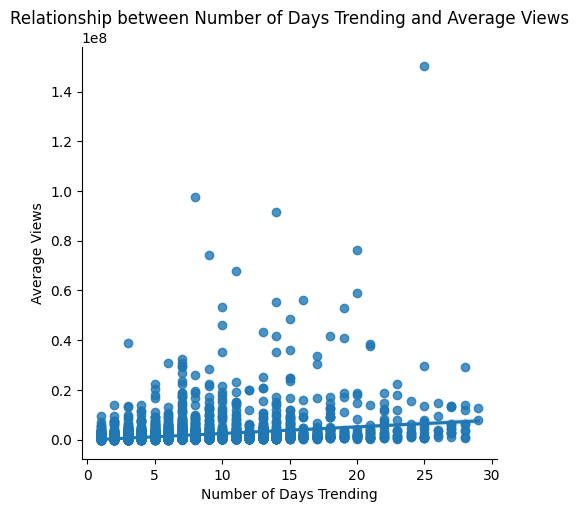

In [24]:
import matplotlib.pyplot as plt
mean_views_per_video = data.groupby('video_id')['views'].mean()
trending_views_df = pd.DataFrame(mean_views_per_video).merge(pd.DataFrame(trending_days_count), left_index=True, right_index=True)

print(mean_views_per_video)

# Create a scatter plot with a linear fit
sns.lmplot(x='trending_date', y='views', data=trending_views_df)
plt.xlabel('Number of Days Trending')
plt.ylabel('Average Views')
plt.title('Relationship between Number of Days Trending and Average Views')

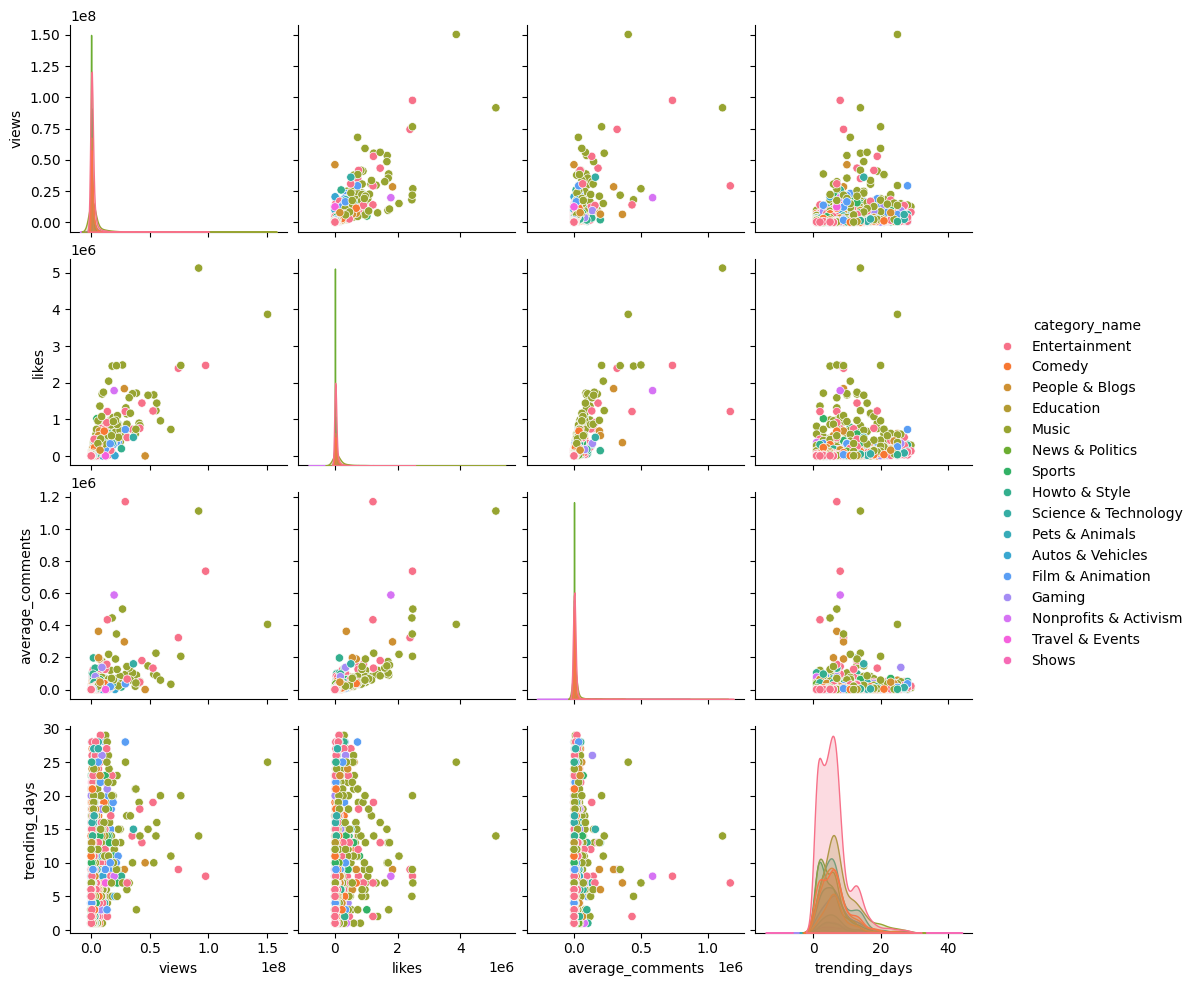

                     views     likes  average_comments  trending_days
views             1.000000  0.831174          0.610545       0.266196
likes             0.831174  1.000000          0.779986       0.213573
average_comments  0.610545  0.779986          1.000000       0.116580
trending_days     0.266196  0.213573          0.116580       1.000000


In [25]:
# Calculate the number of days trending for each video
trending_days = data.groupby('video_id')['trending_date'].nunique()

# Calculate the average views, likes, and comments for each video
average_metrics = data.groupby('video_id')[['views', 'likes', 'comment_count']].mean()

# Merge the calculations with the category information
merged_data = (average_metrics
               .merge(trending_days, left_index=True, right_index=True)
               .merge(data[['video_id', 'category_name']].drop_duplicates(), left_index=True, right_on='video_id'))

# Rename columns for clarity
merged_data.rename(columns={'trending_date': 'trending_days', 'comment_count': 'average_comments'}, inplace=True)

# Analyze the relationship between the variables
# You can use a pairplot to visualize the relationships
sns.pairplot(merged_data, vars=['views', 'likes', 'average_comments', 'trending_days'], hue='category_name')
plt.show()

# You can also compute the correlation matrix
correlation_matrix = merged_data[['views', 'likes', 'average_comments', 'trending_days']].corr()
print(correlation_matrix)

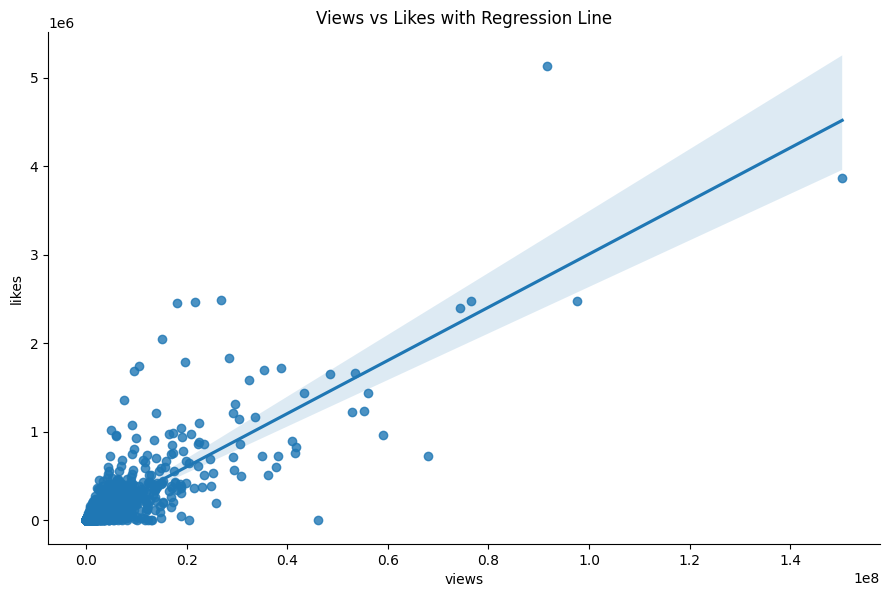

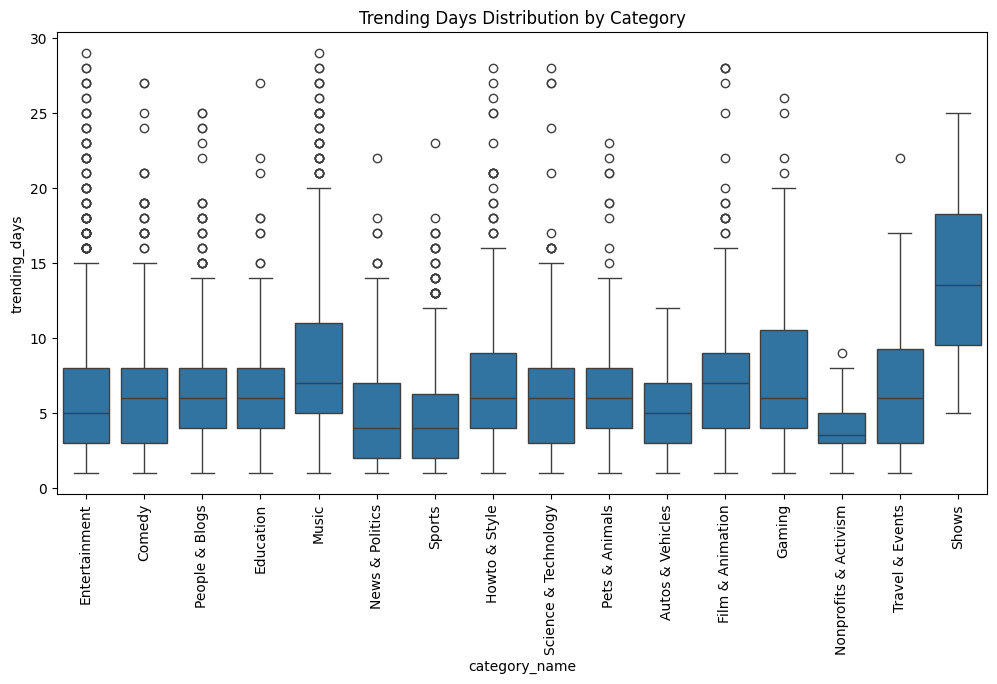

In [28]:
sns.lmplot(x='views', y='likes', data=merged_data, height=6, aspect=1.5)
plt.title('Views vs Likes with Regression Line')
plt.show()

#boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='category_name', y='trending_days', data=merged_data)
plt.xticks(rotation=90)
plt.title('Trending Days Distribution by Category')
plt.show()


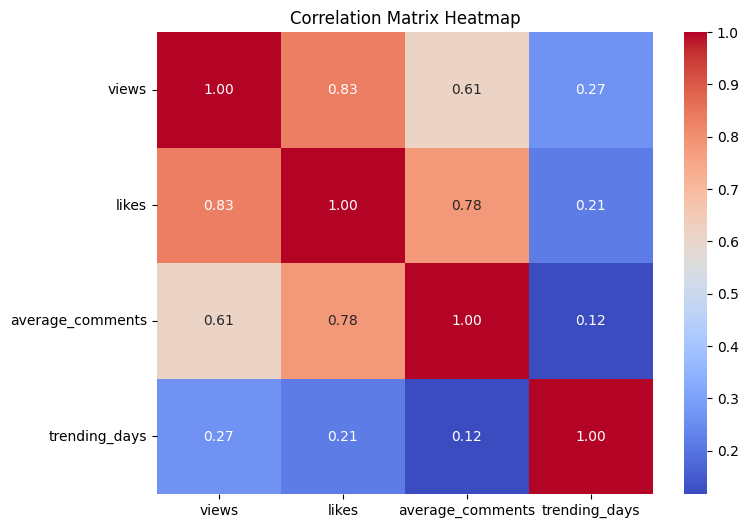

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


In [31]:
from scipy import stats
groups = data.groupby('category_name')['views'].apply(list)
f_val, p_val = stats.f_oneway(*groups)

# Print the F-value and p-value
print('F-value:', f_val)
print('p-value:', p_val)

F-value: 166.16394108097995
p-value: 0.0


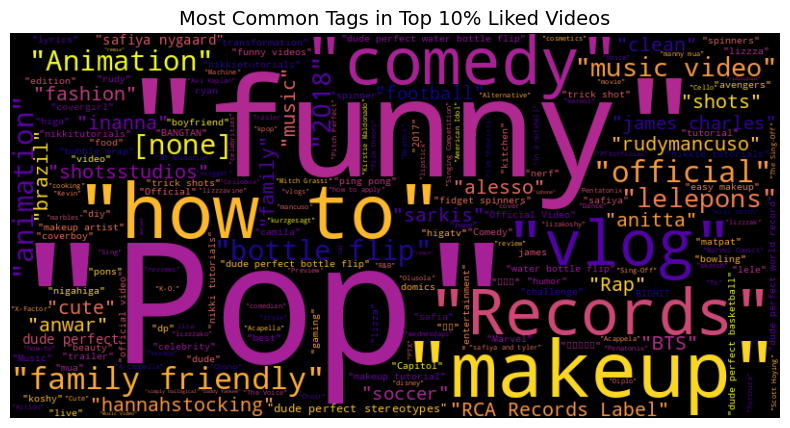

In [35]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Calculate average likes per video
avg_likes = data.groupby('video_id')['likes'].mean()

#Getting top 10% most liked videos
top_liked_videos = avg_likes.sort_values(ascending=False).head(int(len(avg_likes) * 0.1))

#Filter the dataset for these top liked videos
top_liked_data = data[data['video_id'].isin(top_liked_videos.index)]

#Combine and count all tags
tags = '|'.join(top_liked_data['tags'].dropna()).split('|')
tag_counts = Counter(tags)

#word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate_from_frequencies(tag_counts)

#Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Tags in Top 10% Liked Videos", fontsize=14)
plt.show()


In [36]:
# Calculate the engagement ratios
data['likes_to_views_ratio'] = data['likes'] / data['views']
data['comments_to_views_ratio'] = data['comment_count'] / data['views']
data['dislikes_to_views_ratio'] = data['dislikes'] / data['views']

# Group by 'video_id' and calculate the mean for the ratios and other engagement metrics
engagement_metrics = data.groupby('video_id').agg({
    'likes_to_views_ratio': 'mean',
    'comments_to_views_ratio': 'mean',
    'dislikes_to_views_ratio': 'mean',
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

engagement_summary = engagement_metrics.describe()
print(engagement_summary)

       likes_to_views_ratio  comments_to_views_ratio  dislikes_to_views_ratio  \
count           6351.000000              6351.000000              6351.000000   
mean               0.032663                 0.004517                 0.001652   
std                0.026795                 0.005596                 0.004233   
min                0.000000                 0.000000                 0.000000   
25%                0.012477                 0.001588                 0.000517   
50%                0.026573                 0.003032                 0.000890   
75%                0.045249                 0.005319                 0.001592   
max                0.226856                 0.101939                 0.190366   

              views         likes      dislikes  comment_count  
count  6.351000e+03  6.351000e+03  6.351000e+03   6.351000e+03  
mean   1.475769e+06  4.863096e+04  2.542702e+03   5.896016e+03  
std    4.612219e+06  1.665437e+05  2.516670e+04   3.037680e+04  
min    5.5

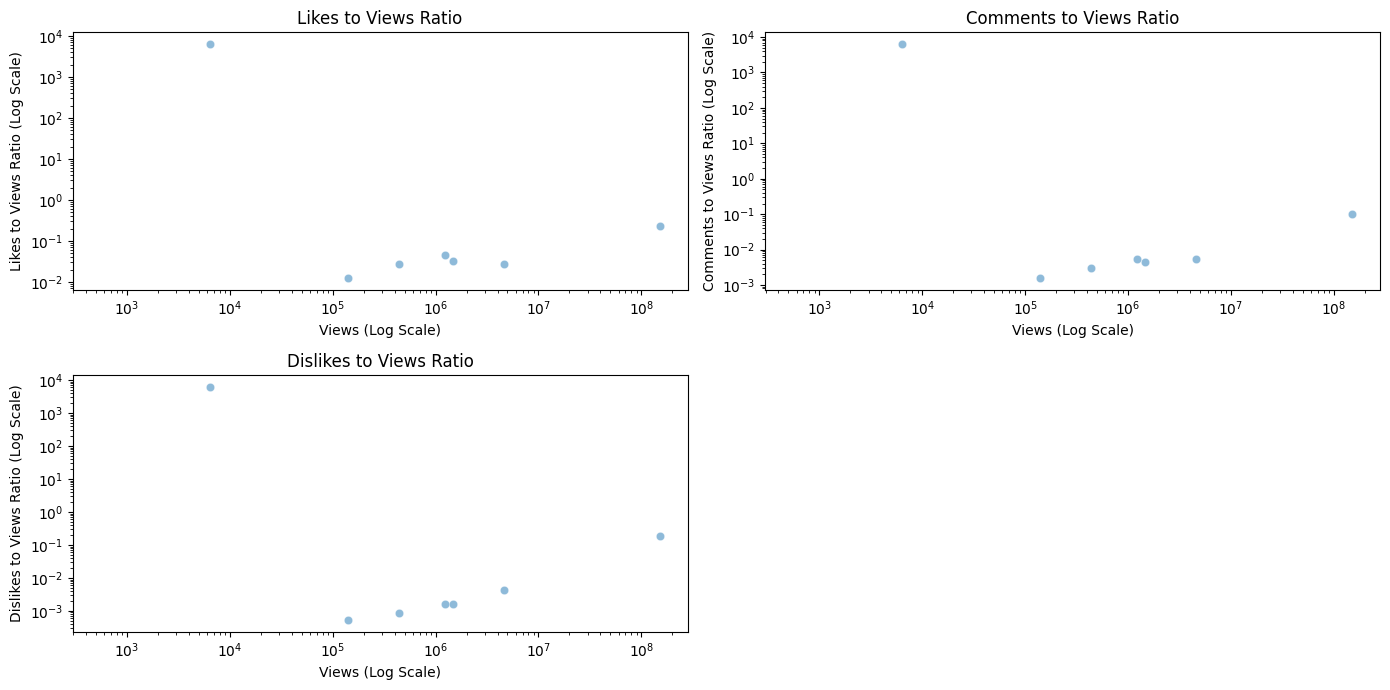

In [37]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 2, 1)
sns.scatterplot(data=engagement_summary, x='views', y='likes_to_views_ratio', alpha=0.5)
plt.title('Likes to Views Ratio')
plt.xscale('log')  # Using a log scale due to the wide range of views
plt.yscale('log')  # Using a log scale due to the wide range of ratios
plt.xlabel('Views (Log Scale)')
plt.ylabel('Likes to Views Ratio (Log Scale)')

# Comments to Views Ratio Scatter Plot
plt.subplot(2, 2, 2)
sns.scatterplot(data=engagement_summary, x='views', y='comments_to_views_ratio', alpha=0.5)
plt.title('Comments to Views Ratio')
plt.xscale('log')  # Using a log scale due to the wide range of views
plt.yscale('log')  # Using a log scale due to the wide range of ratios
plt.xlabel('Views (Log Scale)')
plt.ylabel('Comments to Views Ratio (Log Scale)')

# Dislikes to Views Ratio Scatter Plot
plt.subplot(2, 2, 3)
sns.scatterplot(data=engagement_summary, x='views', y='dislikes_to_views_ratio', alpha=0.5)
plt.title('Dislikes to Views Ratio')
plt.xscale('log')  # Using a log scale due to the wide range of views
plt.yscale('log')  # Using a log scale due to the wide range of ratios
plt.xlabel('Views (Log Scale)')
plt.ylabel('Dislikes to Views Ratio (Log Scale)')

# Show the plots
plt.tight_layout()
plt.show()

/tmp/ipython-input-39-1230975045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_views.values, y=category_views.index, palette='viridis')


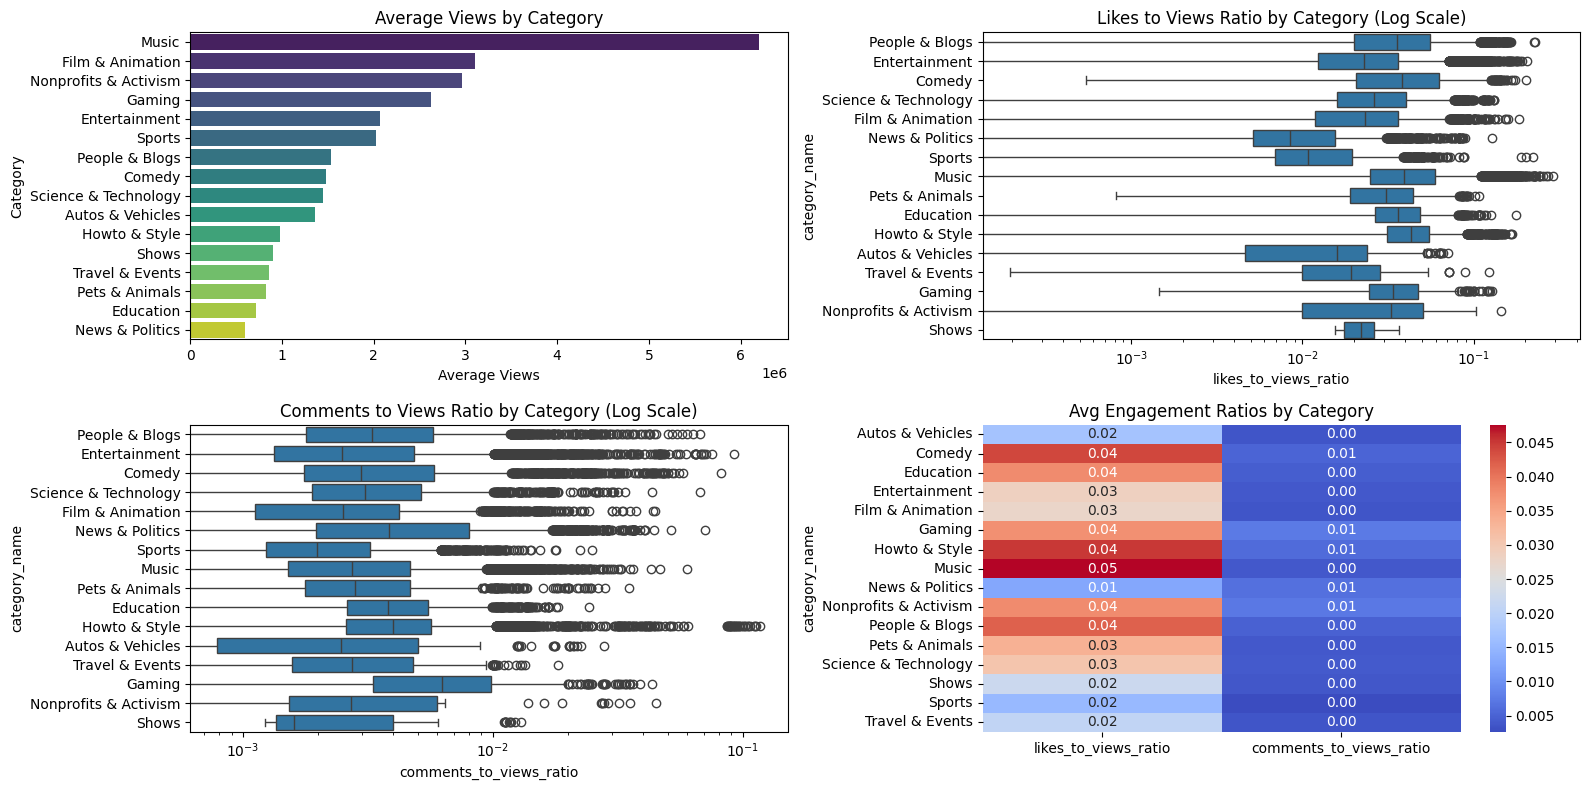

In [39]:
plt.figure(figsize=(16, 8))

#Average Views by Category
plt.subplot(2, 2, 1)
category_views = data.groupby('category_name')['views'].mean().sort_values(ascending=False)
sns.barplot(x=category_views.values, y=category_views.index, palette='viridis')
plt.title('Average Views by Category')
plt.xlabel('Average Views')
plt.ylabel('Category')

#Likes to Views Ratio Boxplot
plt.subplot(2, 2, 2)
data['likes_to_views_ratio'] = data['likes'] / data['views']
sns.boxplot(data=data, x='likes_to_views_ratio', y='category_name')
plt.xscale('log')
plt.title('Likes to Views Ratio by Category (Log Scale)')

#Comments to Views Ratio Boxplot
plt.subplot(2, 2, 3)
data['comments_to_views_ratio'] = data['comment_count'] / data['views']
sns.boxplot(data=data, x='comments_to_views_ratio', y='category_name')
plt.xscale('log')
plt.title('Comments to Views Ratio by Category (Log Scale)')

#Heatmap of Average Engagement Ratios per Category
plt.subplot(2, 2, 4)
engagement_by_cat = data.groupby('category_name')[['likes_to_views_ratio', 'comments_to_views_ratio']].mean()
sns.heatmap(engagement_by_cat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Avg Engagement Ratios by Category')

plt.tight_layout()
plt.show()


/tmp/ipython-input-41-959391962.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_likes.index, y=day_likes.values, ax=axes[0, 0], palette="Blues")
/tmp/ipython-input-41-959391962.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_likes.index, y=hour_likes.values, ax=axes[0, 1], palette="Greens")
/tmp/ipython-input-41-959391962.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_comments.index, y=day_comments.values, ax=axes[1, 0], palette="Purples")
/tmp/ipython-input-41-959391962.py:35: FutureWarning: 

Passing `pal

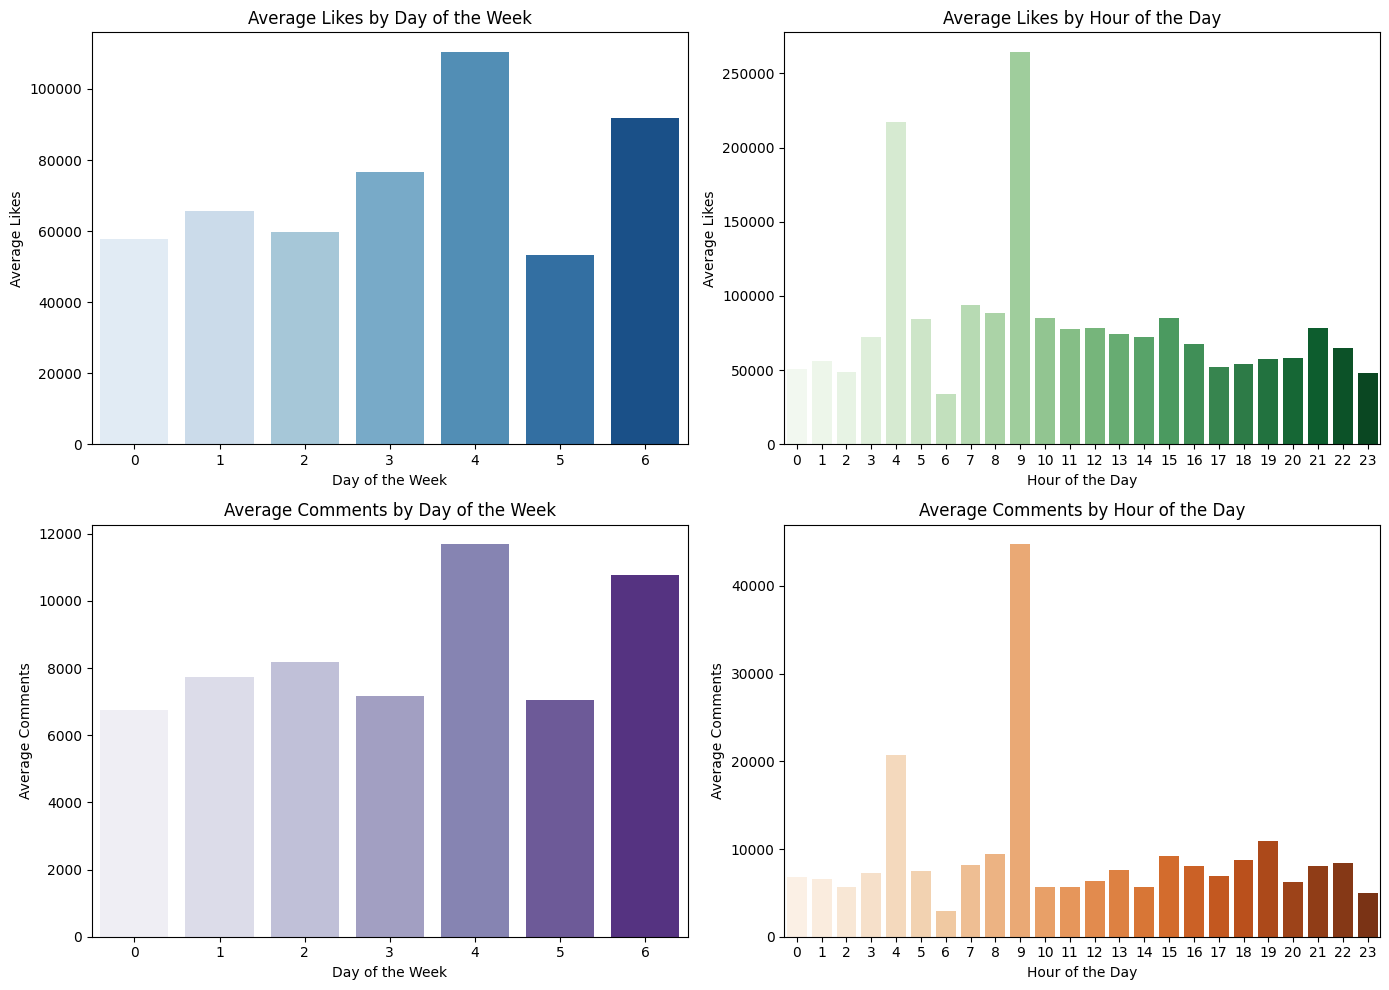

In [41]:
# Ensure datetime conversion
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_day'] = data['publish_time'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['publish_hour'] = data['publish_time'].dt.hour

# Group by publish day and hour
day_likes = data.groupby('publish_day')['likes'].mean()
hour_likes = data.groupby('publish_hour')['likes'].mean()

day_comments = data.groupby('publish_day')['comment_count'].mean()
hour_comments = data.groupby('publish_hour')['comment_count'].mean()

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Likes by Day
sns.barplot(x=day_likes.index, y=day_likes.values, ax=axes[0, 0], palette="Blues")
axes[0, 0].set_title('Average Likes by Day of the Week')
axes[0, 0].set_xlabel('Day of the Week')
axes[0, 0].set_ylabel('Average Likes')

# Likes by Hour
sns.barplot(x=hour_likes.index, y=hour_likes.values, ax=axes[0, 1], palette="Greens")
axes[0, 1].set_title('Average Likes by Hour of the Day')
axes[0, 1].set_xlabel('Hour of the Day')
axes[0, 1].set_ylabel('Average Likes')

# Comments by Day
sns.barplot(x=day_comments.index, y=day_comments.values, ax=axes[1, 0], palette="Purples")
axes[1, 0].set_title('Average Comments by Day of the Week')
axes[1, 0].set_xlabel('Day of the Week')
axes[1, 0].set_ylabel('Average Comments')

# Comments by Hour
sns.barplot(x=hour_comments.index, y=hour_comments.values, ax=axes[1, 1], palette="Oranges")
axes[1, 1].set_title('Average Comments by Hour of the Day')
axes[1, 1].set_xlabel('Hour of the Day')
axes[1, 1].set_ylabel('Average Comments')

plt.tight_layout()
plt.show()


In [43]:
from scipy import stats

# Group data by category
category_groups = [group['likes'] for name, group in data.groupby('category_name')]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*category_groups)

# Significance test
alpha = 0.05
if p_value < alpha:
    print("The differences in average likes among categories are statistically significant.")
else:
    print("There is no statistically significant difference in average likes among categories.")


The differences in average likes among categories are statistically significant.


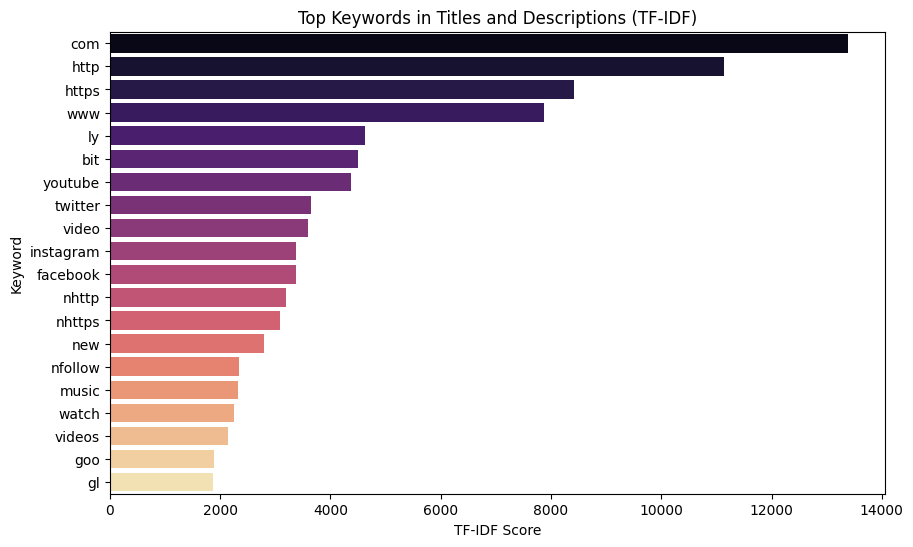

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Combine title and description
data['text'] = data['title'].fillna('') + ' ' + data['description'].fillna('')

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)  # limit to top 20 features
tfidf_matrix = vectorizer.fit_transform(data['text'])

# Extract top TF-IDF keywords
tfidf_scores = tfidf_matrix.sum(axis=0).A1  # get array of summed TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame({'term': feature_names, 'score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='score', ascending=False)

# Plot top keywords
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='term', data=tfidf_df, palette='magma')
plt.title('Top Keywords in Titles and Descriptions (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keyword')
plt.show()


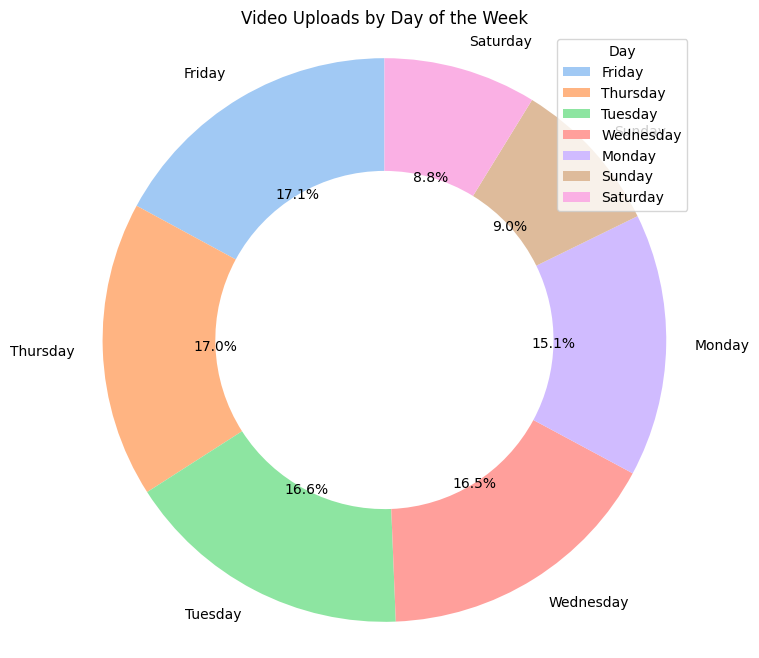

In [45]:
# Convert publish_time and extract day name
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_day'] = data['publish_time'].dt.day_name()

# Count number of videos per day
day_counts = data['publish_day'].value_counts()

# Plot donut chart
plt.figure(figsize=(8, 8))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(width=0.4), colors=sns.color_palette('pastel'))
plt.title('Video Uploads by Day of the Week')
plt.axis('equal')
plt.legend(title='Day', loc='upper right')
plt.show()


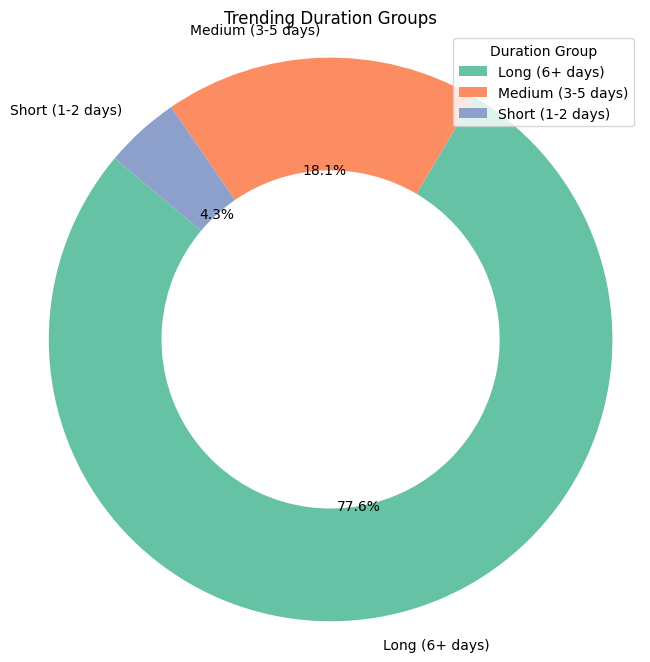

In [46]:
# Calculate how many days each video trended
data['trending_days'] = data.groupby('video_id')['trending_date'].transform('nunique')

# Define trending duration groups
def label_duration(days):
    if days <= 2:
        return 'Short (1-2 days)'
    elif days <= 5:
        return 'Medium (3-5 days)'
    else:
        return 'Long (6+ days)'

data['trending_group'] = data['trending_days'].apply(label_duration)
duration_counts = data['trending_group'].value_counts()

# Plot donut
plt.figure(figsize=(8, 8))
plt.pie(duration_counts, labels=duration_counts.index, autopct='%1.1f%%', startangle=140,
        wedgeprops=dict(width=0.4), colors=sns.color_palette('Set2'))
plt.title('Trending Duration Groups')
plt.axis('equal')
plt.legend(title='Duration Group', loc='upper right')
plt.show()
